# Neural Network Classification With PyTorch

Classification is a proble of predicting whether something is one thing or another (there can be multiple things as the optins)

* Learnpytorch.io: https://www.learnpytorch.io/02_pytorch_classification/
* PyTorch Doc: https://pytorch.org/docs/stable/index.html
* Github Code: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/02_pytorch_classification.ipynb
* Stuck: Go to the github discussion tab.

## 1. Make Classification data and get it ready

In [1]:
# Scikit-learn for data
import sklearn
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise = 0.04,
                    random_state = 42)

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"Print first 5 sample of X: \n{X[:5]}")
print(f"Print first 5 sample of y: \n{y[:5]}")
print(f"Type of X: {type(X)}")
print(f"Type of y: {type(y)}")

Print first 5 sample of X: 
[[ 0.74822656  0.23908325]
 [-0.74509559  0.16097526]
 [-0.82262532  0.19762051]
 [-0.41143316  0.68255648]
 [ 0.44390494 -0.89582949]]
Print first 5 sample of y: 
[1 1 1 1 0]
Type of X: <class 'numpy.ndarray'>
Type of y: <class 'numpy.ndarray'>


## Make DataFrame of circle data

In [4]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})
circles.head()

,X1,X2,label
0,0.748227,0.239083,1
1,-0.745096,0.160975,1
2,-0.822625,0.197621,1
3,-0.411433,0.682556,1
4,0.443905,-0.895829,0


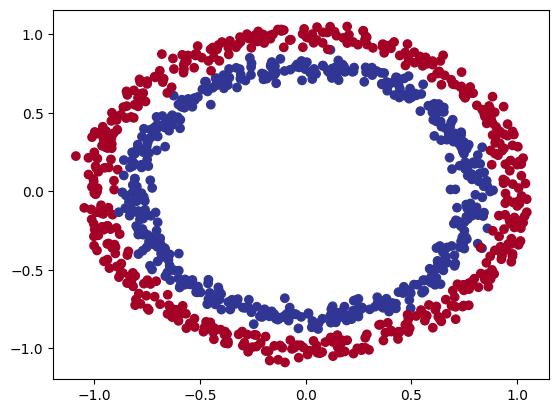

In [5]:
# Visualize, visualize and Visualize
import matplotlib.pyplot as plt

plt.scatter(x = X[:, 0], y = X[:,1], c = y, cmap = plt.cm.RdYlBu) # cmap = colormap

Note: the data we'are working with is often referred to as a toyt dataset, a dataset taht is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# view the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of x: {X_sample}")
print(f"Shape for one sample of x: {X_sample.shape}")
print(f"Values for one sample of y: {y_sample}")
print(f"Shape for one sample of y: {y_sample.shape}")

Values for one sample of x: [0.74822656 0.23908325]
Shape for one sample of x: (2,)
Values for one sample of y: 1
Shape for one sample of y: ()


### 1.2 Turn data into tensors and create train and test splits

In [8]:
import torch
torch.__version__

'2.4.0+cu121'

In [9]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # torch.float for float 32
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7482,  0.2391],
         [-0.7451,  0.1610],
         [-0.8226,  0.1976],
         [-0.4114,  0.6826],
         [ 0.4439, -0.8958]]),
 tensor([1., 1., 1., 1., 0.]))

### 1.3 Split data into train-test-split

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=32,
                                                    stratify = y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one.
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [11]:
# Import PyTorch and nn
import torch
from torch import nn

In [12]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we've setup device agnostic code, let's create a model that:

1.sublcasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create `nn.Linear()` layers that are capable of handling that shapes of our data
3. Define a `forward()` method that outlines the forward pass (or forward computation)
4. Instantiate an instance of our model class and sent it to the target device

In [13]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [14]:
# 1. Constract a model that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear Layer capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features = 2, out_features = 5) # first layer: takes in 2 features and outputs 5 featues
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1) # second layer or final layer: takes in 5 features and outputs 1 feature
  # 3. Define a forward() method that outliens the forward pass
  def forward(self, x):
    return self.layer_2(self.layer1(x)) # x -> layer_1 -> layer_2

# 4. Instantia an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [15]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1090, -0.3308],
                      [-0.0237, -0.3734],
                      [ 0.6897, -0.3766],
                      [ 0.0693,  0.0828],
                      [ 0.1125,  0.1379]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.1665,  0.5334, -0.4140, -0.3519, -0.3411], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1276,  0.2627,  0.0961, -0.2804,  0.3223]], device='cuda:0')),
             ('layer_2.bias', tensor([0.1326], device='cuda:0'))])

Tensorflow Plyaground: https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.01&regularizationRate=0&noise=0&networkShape=5,2&seed=0.43454&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

Video: 9:38

## Let's Replicate the model above using nn.Sequential()

In [16]:
model_0 = nn.Sequential(
    nn.Linear(in_features = 2, out_features =128),
    nn.Linear(in_features = 128, out_features = 1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=128, bias=True)
  (1): Linear(in_features=128, out_features=1, bias=True)
)

In [17]:
# Make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1503,  0.4459],
                      [-0.5743, -0.6382],
                      [ 0.6246,  0.4615],
                      [ 0.6659,  0.4369],
                      [-0.3331, -0.4018],
                      [-0.2097,  0.4208],
                      [-0.2030, -0.0248],
                      [ 0.6757, -0.5097],
                      [ 0.5506, -0.5327],
                      [ 0.4523, -0.4870],
                      [-0.6719,  0.0935],
                      [-0.4445, -0.5540],
                      [-0.1422,  0.1847],
                      [-0.2379,  0.4375],
                      [-0.0563,  0.1174],
                      [-0.2716, -0.0903],
                      [-0.4724,  0.1470],
                      [ 0.1196,  0.6404],
                      [ 0.5327,  0.4656],
                      [-0.6897, -0.3413],
                      [-0.5668,  0.5766],
                      [ 0.3976, -0.5161],
                      [ 0.3522,  0.5094],
        

In [18]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

In [19]:
print(f"Lenght of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")

Lenght of predictions: 200, Shape: torch.Size([200, 1])


In [20]:
untrained_preds[:10].argmax()

tensor(3, device='cuda:0')

In [21]:
import numpy as np
np.argmax(untrained_preds[:10].cpu().detach().numpy())

3

In [22]:
# Calculate accuracy - out of 100 example, what percentage does our model get right?
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # How many are equal
  acc = (correct/len(y_pred))* 100
  return acc

### 2.1 Setup loss and optimizer

Which loss function or optimizer should we use?

Again... this is problem  specific.

for example for regression you might want MAE or MSE

for classification binary cross entropy or categorical cross entropy

* For the loss function we're goin to use `torch.nn.BECWithLogitLoss()`, for more on what binary cross entroy is, google.

* For different optimizer `nn.optim()`


In [23]:
# Setup the loss function
loss_fn = nn.BCEWithLogitsLoss() # signoid activation function

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [24]:
epochs = 200
# Calculate accuracy

## 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outpputs are going to be raw logits.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g. classification sigmoid and softmax for multiclass classification).

Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the max values.

In [25]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[ 0.1482],
        [ 0.0727],
        [ 0.3134],
        [ 0.4927],
        [-0.0511]], device='cuda:0')

In [26]:
y_test[:5]

tensor([0., 1., 1., 0., 1.])

In [27]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5370],
        [0.5182],
        [0.5777],
        [0.6207],
        [0.4872]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0 `y = 1` (class 1)
* `y_pred_probs` < 0.5 `y = 0` (class 0)

In [28]:
torch.round(y_pred_probs)[:5]

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [29]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
# Get rid of extra dimension with squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

### 3.2 Building Training and Testing Loops

In [30]:
device

'cuda'

In [31]:
!nvidia-smi

Mon Sep  9 13:15:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              28W /  70W |    151MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [32]:
# Set the seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set the number of epochs
epochs = 100
# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build the training loop
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train). squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  # 2. calculate the loss/accuracy
  loss = loss_fn(y_logits, y_train) # Our loss expects logits nn.BCEWithLogitLoss
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Loss backward (back propagation)
  loss.backward()
  # 5. optimizer step (gradient descent)
  optimizer.step()
  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_preds)
  # Print whats happeing
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} || Loss: {loss:.5f} || Accuracy: {acc:.2f}% || Test loss: {test_acc:.2f}%")

Epoch: 0 || Loss: 0.70131 || Accuracy: 54.87% || Test loss: 51.00%
Epoch: 10 || Loss: 0.69627 || Accuracy: 51.50% || Test loss: 51.00%
Epoch: 20 || Loss: 0.69457 || Accuracy: 51.25% || Test loss: 49.00%
Epoch: 30 || Loss: 0.69388 || Accuracy: 50.75% || Test loss: 48.50%
Epoch: 40 || Loss: 0.69354 || Accuracy: 50.62% || Test loss: 46.50%
Epoch: 50 || Loss: 0.69335 || Accuracy: 50.88% || Test loss: 46.50%
Epoch: 60 || Loss: 0.69324 || Accuracy: 50.75% || Test loss: 46.50%
Epoch: 70 || Loss: 0.69317 || Accuracy: 50.62% || Test loss: 46.50%
Epoch: 80 || Loss: 0.69313 || Accuracy: 50.50% || Test loss: 46.50%
Epoch: 90 || Loss: 0.69310 || Accuracy: 50.75% || Test loss: 46.50%


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything..

So to inspect it let's make some predictiona dn make them visual!

In other words, viaualize, visualize,and visualize!

To do so, we're goint to import a function called `plot_decision_boundary()` from https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

Use the raw version of the code

In [33]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("Helper_functions.py already exists, skipping downlaod")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


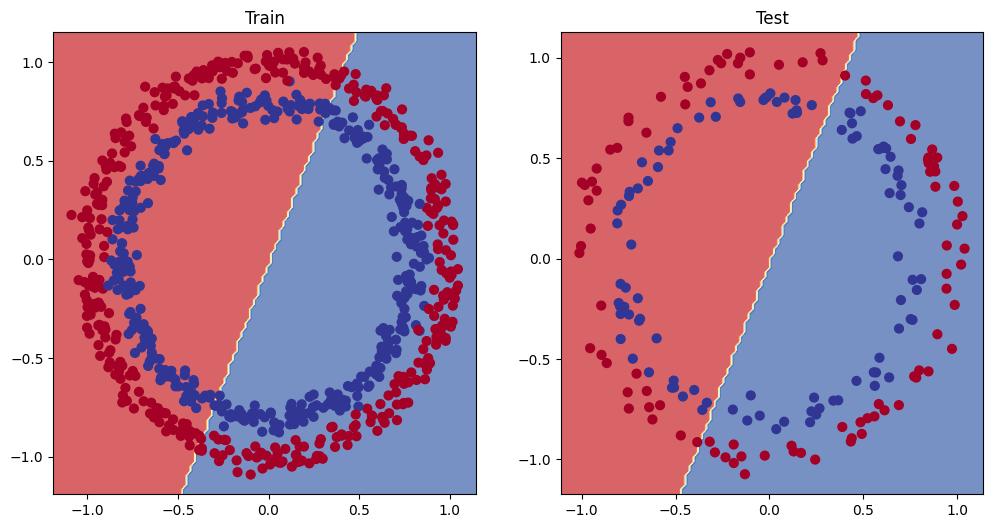

In [34]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train) # ctrl + shift + space for docstring
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a modle perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units (add more neurons) - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directl wth the model, rather than the data.

And because these options are all values we (as ml engineers and data scientists) can cange, they are referred as

In [35]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1500,  0.4460],
                      [-0.5743, -0.6382],
                      [ 0.6253,  0.4613],
                      [ 0.6658,  0.4370],
                      [-0.3338, -0.4016],
                      [-0.2094,  0.4207],
                      [-0.2035, -0.0246],
                      [ 0.6749, -0.5095],
                      [ 0.5500, -0.5325],
                      [ 0.4518, -0.4868],
                      [-0.6711,  0.0932],
                      [-0.4444, -0.5540],
                      [-0.1417,  0.1845],
                      [-0.2378,  0.4375],
                      [-0.0557,  0.1171],
                      [-0.2710, -0.0906],
                      [-0.4723,  0.1470],
                      [ 0.1203,  0.6402],
                      [ 0.5328,  0.4655],
                      [-0.6905, -0.3410],
                      [-0.5666,  0.5765],
                      [ 0.3982, -0.5163],
                      [ 0.3516,  0.5097],
        

### 5.1 Creating a new model

In [36]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

 **Setup the loss function**
loss_fn = nn.BCEWithLogitsLoss() # signoid activation function

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [38]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)

In [39]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69412, Accuracy: 50.62% | Test loss: 0.69193, Test acc: 52.00%
Epoch: 100 | Loss: 0.69311, Accuracy: 50.12% | Test loss: 0.69341, Test acc: 46.00%
Epoch: 200 | Loss: 0.69306, Accuracy: 50.62% | Test loss: 0.69388, Test acc: 47.50%
Epoch: 300 | Loss: 0.69306, Accuracy: 50.75% | Test loss: 0.69398, Test acc: 46.00%
Epoch: 400 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69401, Test acc: 46.00%
Epoch: 500 | Loss: 0.69306, Accuracy: 50.50% | Test loss: 0.69401, Test acc: 46.00%
Epoch: 600 | Loss: 0.69306, Accuracy: 50.62% | Test loss: 0.69401, Test acc: 46.00%
Epoch: 700 | Loss: 0.69306, Accuracy: 50.62% | Test loss: 0.69401, Test acc: 46.00%
Epoch: 800 | Loss: 0.69306, Accuracy: 50.62% | Test loss: 0.69401, Test acc: 46.00%
Epoch: 900 | Loss: 0.69306, Accuracy: 50.62% | Test loss: 0.69401, Test acc: 46.00%


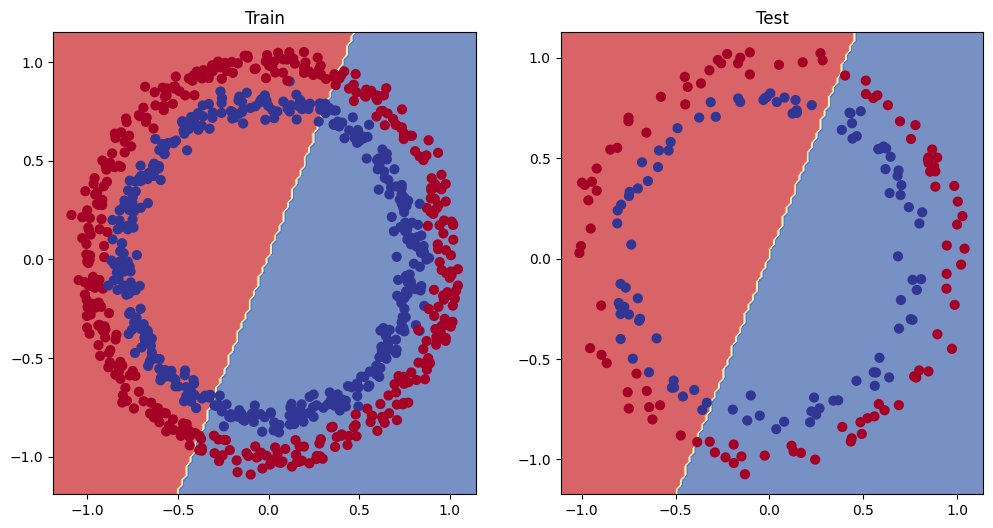

In [40]:
# Plot the decision boundary
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # ctrl + shift + space for docstring
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 6. The missing piece: non-linearity

"What patterns could you draw if yo were given an infinity amount of straight and non-straight lines?"

Or in machine learning terms, an infinity (but really it is finite) of linear na dno-linear functions?

Artificial neural networks are a large combination of linear(straight) and non-straight (non-linear) functions which are potentially able to find patterns in data.

### 6.1 Recreating non-linear data (red and blue circles)

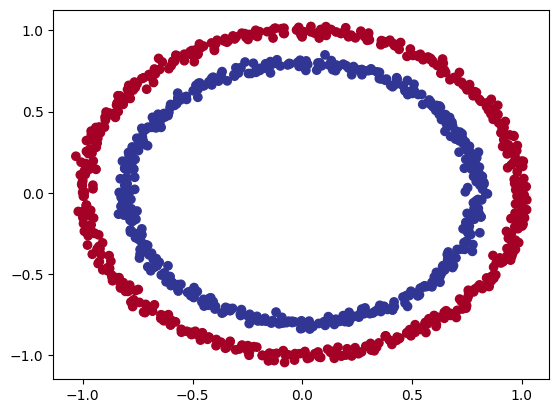

In [41]:
# make and plot data
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample = 1000
X, y = make_circles(n_sample,
                    noise = 0.02,
                    random_state = 42)

plt.scatter(X[:, 0], X[:,1], c= y, cmap = plt.cm.RdYlBu)

In [42]:
# Conver data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state=42)


In [43]:
# Build a model with non-linear activation functions
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features=10, out_features = 1)
    self.relu = nn.ReLU() # relu is a non-linear activation function
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)

In [44]:
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(), lr = 0.1)

### 6.3 Training the model with non-linearity

In [46]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
# Put the data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ## Training
  model_3.train()
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predictin probs -> prediction labels

  # 2.
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  # 3 optimzer zero grad
  optimizer.zero_grad()
  # 4. backward
  loss.backward()
  # step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze() # o/w throw error for dimension
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)
  # Print whats happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss: .4f}, Acc: {acc: .2f} | Test Loss: {test_loss: .4f}, Test Acc: {test_acc: .2f}")

Epoch: 0 | Loss:  0.6929, Acc:  50.00 | Test Loss:  0.6931, Test Acc:  50.00
Epoch: 100 | Loss:  0.6912, Acc:  52.75 | Test Loss:  0.6909, Test Acc:  53.00
Epoch: 200 | Loss:  0.6898, Acc:  53.00 | Test Loss:  0.6892, Test Acc:  55.00
Epoch: 300 | Loss:  0.6880, Acc:  53.00 | Test Loss:  0.6870, Test Acc:  56.50
Epoch: 400 | Loss:  0.6852, Acc:  52.75 | Test Loss:  0.6837, Test Acc:  56.50
Epoch: 500 | Loss:  0.6811, Acc:  52.62 | Test Loss:  0.6788, Test Acc:  56.50
Epoch: 600 | Loss:  0.6752, Acc:  53.87 | Test Loss:  0.6719, Test Acc:  56.50
Epoch: 700 | Loss:  0.6665, Acc:  57.75 | Test Loss:  0.6617, Test Acc:  59.00
Epoch: 800 | Loss:  0.6515, Acc:  63.62 | Test Loss:  0.6455, Test Acc:  67.50
Epoch: 900 | Loss:  0.6233, Acc:  74.25 | Test Loss:  0.6185, Test Acc:  77.50


In [47]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1500,  0.4460],
                      [-0.5743, -0.6382],
                      [ 0.6253,  0.4613],
                      [ 0.6658,  0.4370],
                      [-0.3338, -0.4016],
                      [-0.2094,  0.4207],
                      [-0.2035, -0.0246],
                      [ 0.6749, -0.5095],
                      [ 0.5500, -0.5325],
                      [ 0.4518, -0.4868],
                      [-0.6711,  0.0932],
                      [-0.4444, -0.5540],
                      [-0.1417,  0.1845],
                      [-0.2378,  0.4375],
                      [-0.0557,  0.1171],
                      [-0.2710, -0.0906],
                      [-0.4723,  0.1470],
                      [ 0.1203,  0.6402],
                      [ 0.5328,  0.4655],
                      [-0.6905, -0.3410],
                      [-0.5666,  0.5765],
                      [ 0.3982, -0.5163],
                      [ 0.3516,  0.5097],
        

### 6.4 Evaluating a model trained with non-linear activation functions

In [48]:
# Make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y_test[:5]

(tensor([1., 0., 1., 0., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1.], device='cuda:0'))

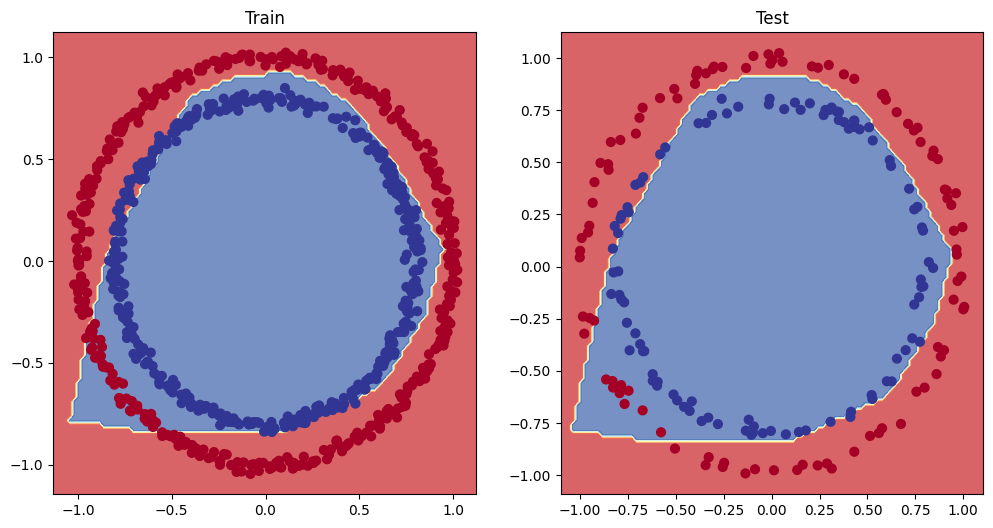

In [49]:
# Plot decision boundaries
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


**Challenge!** Can you improve model3 with better 80% accuracy on test data?

## 7. Replication non-linear activation function

Neural network, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out the patterns on its own.

And these tools are linear & non-linear

In [50]:
# Create a tensor
A = torch.arange(-10, 10, 1, dtype = torch.float32)
A.dtype

torch.float32

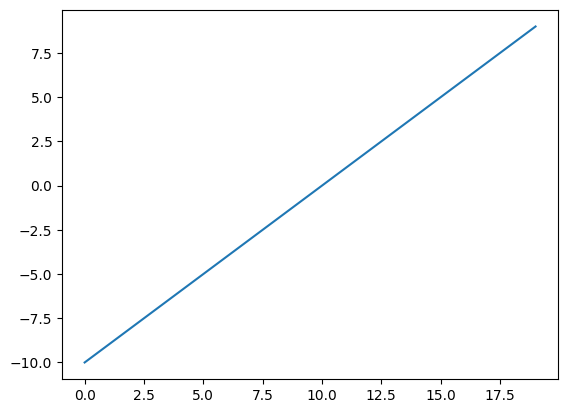

In [51]:
# Visualize the tensor
plt.plot(A);

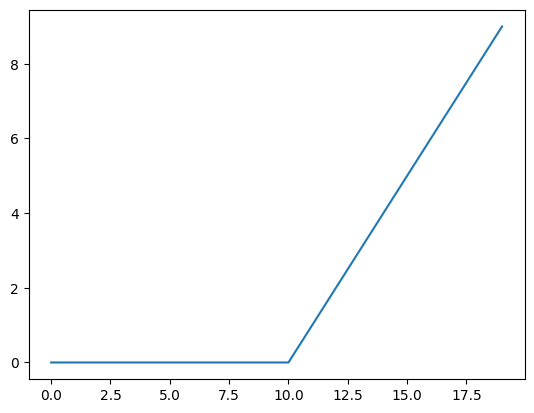

In [52]:
plt.plot(torch.relu(A))

In [53]:
def relu(x: torch.Tensor) -> torch.Tensor:
  """
  ReLU activation function
  Args: x: Input tensor
  Returns: output tensor after applying ReLU
  """
  if not isinstance(x, torch.Tensor):
    raise TypeError("Input must e a torch.Tensor")
  return torch.maximum(torch.tensor(0), x) # inputs must be tensor

In [54]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

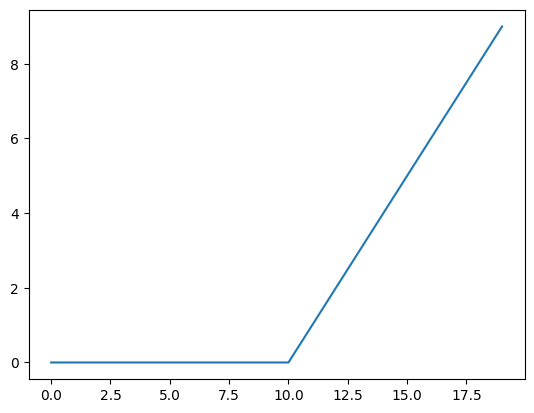

In [55]:
# Plot ReLU activation function
plt.plot(relu(A));

In [56]:
def hardsigmoid(x: torch.Tensor) -> torch.Tensor:
  if not isinstance(x, torch.Tensor):
    raise TypeError("Input must be a type of torch.Tensor")
  if x <= torch.as_tensor(-3):
    return 0
  elif x >= torch.as_tensor(3):
    return 1
  else:
    return (x/6)+(1/2)
  # Throwing RuntimeError

## 8. Putting it all together with a multi-class classification problem

* Binary Classifciation: one thing or another (cat vs dog, spam vs not smap, fraud vs not fraud)
* Multi-class classification = more than one thing or another (cat vs dog vs chicken)

### 8.1 Creating a toy multi-class dataset

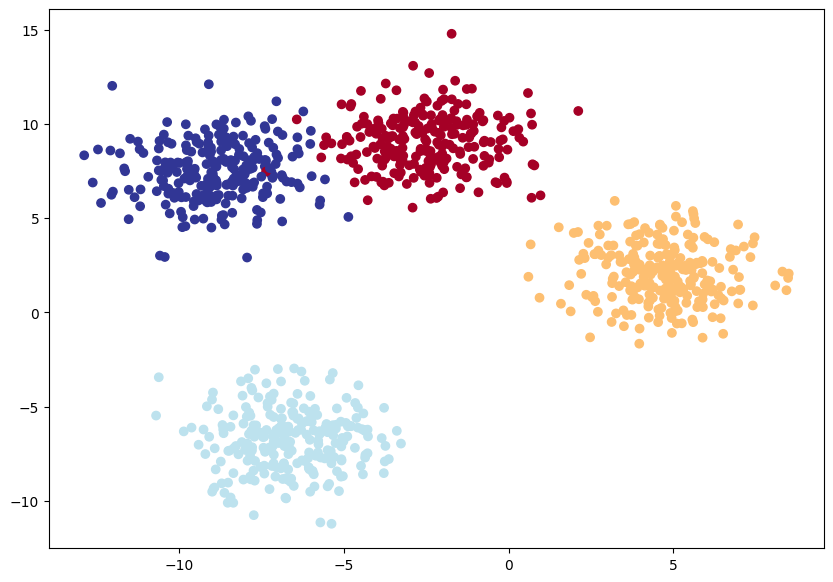

In [57]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyper parameter for data creation
NUM_SAMPLES = 1000
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples = 1000,
                            n_features = NUM_FEATURES,
                            centers = NUM_CLASSES,
                            cluster_std = 1.5,
                            random_state = RANDOM_SEED)

# 2. Turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test
X_blob_trian, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize = (10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu)

### 8.2 Building a classification-model in PyTorch

In [58]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [59]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units = 8):
    """Initialization multi-class classification model.
    Args:
      input_features (int) : Number of input featues to the model
      output_featues (int) : Number of output featues (number of output classes)
      hidden_units (int) : Number of hidded units between layers, default 8
    Retures:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units, out_features = output_features)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=2,
                    output_features = 4,
                    hidden_units = 8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [60]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]], device='cuda:0')),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691],
                     device='cuda:0')),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0

### 8.3 Create a loss function and optimizer for a multi-class classification

In [61]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer function
optimizer = torch.optim.SGD(params = model_4.parameters(), lr = 0.1) # Learning rate is hyperparameter you can change

### 8.4 Building a training loop...

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities and then to prediction labels

Logits (raw output of the model) -> Pred Probs (use `torch.softmax()`) -> Pred Labels (take the argmax to the prediction labels)

### 8.4 Building a training & testing loop...

In [63]:
# fit the multi-class model to the data
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set number of epochs
epochs = 100

# Put the data to target device
X_blob_train = X_blob_trian.to(device)
X_blob_test = X_blob_test.to(device)
y_blob_train = y_blob_train.to(device)
y_blob_test = y_blob_test.to(device)

# Loop through data
for epoch in range(epochs):
  ## Model Training
  model_4.train()
  # Forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim = 1).argmax(dim = 1)

  # Calculate the loss
  loss = loss_fn(y_logits, y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train, y_pred = y_pred)

  # Zero grad
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing..
  model_4.eval()
  with torch.inference_mode():
    y_test_logits = model_4(X_blob_test)
    y_test_pred = torch.softmax(y_test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(y_test_logits, y_blob_test)
    acc_test = accuracy_fn(y_true = y_blob_test, y_pred= y_test_pred)
  # print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch : {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f} | Test Loss: {test_loss:.4f}, Test Acc: {acc_test:.2f}")


# Run the code --> Error? --> Google the error/ Read The Documentation --> Run Again

Epoch : 0 | Loss: 1.0636, Acc: 54.62 | Test Loss: 1.0039, Test Acc: 55.00
Epoch : 10 | Loss: 0.6210, Acc: 97.25 | Test Loss: 0.6367, Test Acc: 98.00
Epoch : 20 | Loss: 0.4061, Acc: 98.75 | Test Loss: 0.4104, Test Acc: 100.00
Epoch : 30 | Loss: 0.2362, Acc: 99.12 | Test Loss: 0.2268, Test Acc: 99.50
Epoch : 40 | Loss: 0.1044, Acc: 99.25 | Test Loss: 0.0949, Test Acc: 99.50
Epoch : 50 | Loss: 0.0640, Acc: 99.25 | Test Loss: 0.0563, Test Acc: 99.50
Epoch : 60 | Loss: 0.0497, Acc: 99.25 | Test Loss: 0.0419, Test Acc: 99.50
Epoch : 70 | Loss: 0.0424, Acc: 99.25 | Test Loss: 0.0343, Test Acc: 99.50
Epoch : 80 | Loss: 0.0380, Acc: 99.25 | Test Loss: 0.0295, Test Acc: 99.50
Epoch : 90 | Loss: 0.0350, Acc: 99.25 | Test Loss: 0.0264, Test Acc: 99.50


Text(0.5, 1.0, 'Test')

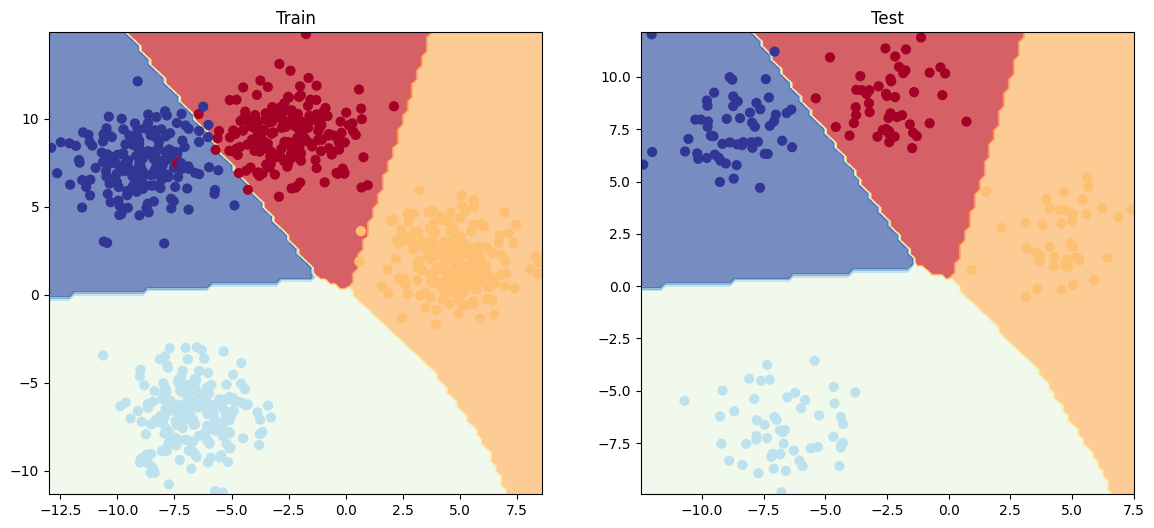

In [70]:
# This will send the mdoel to cpu: Make sure to bring back to device after this code

# Plot Decision Boundary
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.title("Train")
plt.subplot(1,2,2)
plot_decision_boundary(model_4, X_blob_test, y_blob_test)
plt.title("Test")


### 8.6. Making and Evaluation prediction with a PyTorch multi-class Model

In [77]:
# Make Prediction
model_4.to(device)
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6257,  6.0063, -7.6488, -8.4666],
        [-2.1813, -6.3889, -3.7303,  3.1376],
        [-3.4241, -3.9088,  3.1701, -2.6211],
        [-1.1539,  4.2110, -3.8565, -4.8926],
        [ 3.7713, -1.3379, -9.1623, -6.9665],
        [-2.8284, -7.5936, -4.3072,  3.8118],
        [-3.0427, -3.3442,  2.8070, -2.1454],
        [ 3.3902, -4.0445, -6.9149, -3.5610],
        [-4.3793, -5.0066,  3.8291, -3.3930],
        [ 3.5159, -3.0320, -7.5575, -4.7203]], device='cuda:0')

In [78]:
# go from logits -> Prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim = 1)
y_pred_probs[:10]

tensor([[1.3158e-03, 9.9868e-01, 1.1725e-06, 5.1754e-07],
        [4.8691e-03, 7.2458e-05, 1.0344e-03, 9.9402e-01],
        [1.3611e-03, 8.3833e-04, 9.9476e-01, 3.0383e-03],
        [4.6540e-03, 9.9492e-01, 3.1196e-04, 1.1070e-04],
        [9.9397e-01, 6.0044e-03, 2.4010e-06, 2.1578e-05],
        [1.3046e-03, 1.1117e-05, 2.9733e-04, 9.9839e-01],
        [2.8462e-03, 2.1055e-03, 9.8807e-01, 6.9819e-03],
        [9.9842e-01, 5.8947e-04, 3.3409e-05, 9.5600e-04],
        [2.7205e-04, 1.4528e-04, 9.9885e-01, 7.2945e-04],
        [9.9829e-01, 1.4306e-03, 1.5493e-05, 2.6444e-04]], device='cuda:0')

In [79]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim = 1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plt.title("Train")

## 9. A few more classification metrics.. (to evaluate our classification model)

* Accuracy - out of 100 sample, how many our model got right
* Precision
* Recall
* F1-scores
* confusion matrix
* Classification report

In [ ]:
! pip install torchmetrics

In [89]:
from torchmetrics.classification import MulticlassConfusionMatrix
from sklearn.metrics import ConfusionMatrixDisplay
# torchmetrics.classification.MulticlassConfusionMatrix

metric = MulticlassConfusionMatrix(num_classes = 4)
cf = metric(y_preds.to("cpu"), y_blob_test.to("cpu"))
cnf = ConfusionMatrixDisplay(cf, display_labels=["0","1","2","3"])
# plot cnf is you want


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 20.1 MB/s eta 0:00:00
